In [21]:
%load_ext autoreload
%autoreload 2

import math
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

from algorithms import alg_11

def plot_capacity_progression(data, labels, classes):
    sizes = [0, 0.25, 0.5, 1, 2, 5, 10, 20, 40, 80, 100]
    mecs = torch.Tensor(alg_11(data.flatten(start_dim=1), labels, sizes))*math.log2(classes)

    data_rand = torch.rand_like(data)
    labels_rand = torch.randint(0, 15, labels.shape)
    mecs_rand = torch.Tensor(alg_11(data_rand.flatten(start_dim=1), labels_rand, sizes))*math.log2(classes)

    plt.plot(sizes, 100*mecs / data.shape[0])
    plt.plot(sizes, 100*mecs_rand / data.shape[0])
    plt.plot(sizes, sizes)
    plt.title('Estimated MEC needed')
    plt.xlabel('Percentage of dataset')
    plt.ylabel('MEC needed (%) for correct classification')
    plt.ylim(bottom=0, top=1)
    plt.grid()
    plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Images shape:  torch.Size([15000, 1, 64, 64]) Images dtype:  torch.uint8 Labels shape:  torch.Size([15000]) Labels dtype:  torch.int64
Data shape:  torch.Size([4995, 1, 64, 64])
Mean:  tensor([2.1979]) Std:  tensor([13.8817])


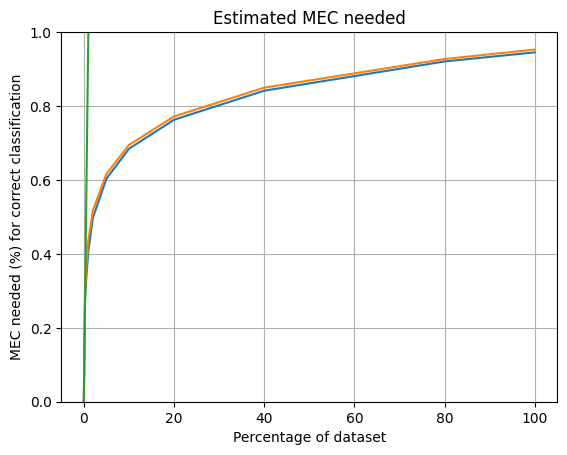

In [22]:
from chinese_mnist_loader import load_chinese_mnist
from utils import prepare_data_loaders, unpack_dataset

data, labels = load_chinese_mnist()
data_loaders, data_sets, transform = prepare_data_loaders(data, labels, train_perc=0.333, test_perc=0.333, batch_size=50, num_workers=4)
data, labels = unpack_dataset(data_sets['train_data'])

plot_capacity_progression(data, labels, classes=15)

In [23]:
from utils import load_cifar10

cifar_train_data, _ = load_cifar10()

data, labels = torch.vstack([d for d, _ in cifar_train_data]), torch.Tensor([l for _, l in cifar_train_data])
data_loaders, data_sets, transform = prepare_data_loaders(data, labels, train_perc=1, test_perc=0, batch_size=50, num_workers=4)
data, labels = unpack_dataset(data_sets['train_data'])

data, labels = unpack_dataset(cifar_train_data)

plot_capacity_progression(data, labels, classes=10)

Files already downloaded and verified
Files already downloaded and verified


RuntimeError: "check_uniform_bounds" not implemented for 'Byte'